<a href="https://colab.research.google.com/github/actionlion/bigdata_edu_sample/blob/main/Data_Table_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습

In [ ]:
!pip install livelossplot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,  accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

from mlxtend.plotting import plot_decision_regions

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from livelossplot import PlotLossesKeras
from keras.utils import to_categorical

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/vds16.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8064 non-null   object 
 1   ToVol    8064 non-null   int64  
 2   SmVol    8064 non-null   int64  
 3   MeVol    8064 non-null   int64  
 4   LaVol    8064 non-null   int64  
 5   Speed    8064 non-null   float64
 6   OccRate  8064 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 441.1+ KB


In [ ]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87
3,2017-04-02 0:15,45,36,9,0,50.9,1.72
4,2017-04-02 0:20,27,13,13,1,62.2,1.12


In [ ]:
df.tail()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate
8059,2017-04-29 23:35,45,35,10,0,51.3,2.01
8060,2017-04-29 23:40,47,33,14,0,53.9,1.89
8061,2017-04-29 23:45,32,28,4,0,50.6,1.36
8062,2017-04-29 23:50,31,21,10,0,59.3,1.40
8063,2017-04-29 23:55,39,33,6,0,52.5,1.74


In [ ]:
df['new_Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d %H:%M")

In [ ]:
df.head(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,2017-04-02 00:00:00
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,2017-04-02 00:05:00
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,2017-04-02 00:10:00


In [ ]:
df.tail(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date
8061,2017-04-29 23:45,32,28,4,0,50.6,1.36,2017-04-29 23:45:00
8062,2017-04-29 23:50,31,21,10,0,59.3,1.40,2017-04-29 23:50:00
8063,2017-04-29 23:55,39,33,6,0,52.5,1.74,2017-04-29 23:55:00


In [ ]:
df['time'] = df['new_Date'].dt.time
df['hour'] = df['new_Date'].dt.hour
df['day'] = df['new_Date'].dt.day
df['day_name'] = df['new_Date'].dt.day_name()
df['weekday'] = df['new_Date'].dt.weekday

In [ ]:
df.tail(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday
8061,2017-04-29 23:45,32,28,4,0,50.6,1.36,2017-04-29 23:45:00,23:45:00,23,29,Saturday,5
8062,2017-04-29 23:50,31,21,10,0,59.3,1.40,2017-04-29 23:50:00,23:50:00,23,29,Saturday,5
8063,2017-04-29 23:55,39,33,6,0,52.5,1.74,2017-04-29 23:55:00,23:55:00,23,29,Saturday,5


In [ ]:
df = df[df.weekday.isin([0,1,2,3,4])]
#5: 토요일, 6:일요일

In [ ]:
df.tail(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday
7773,2017-04-28 23:45,81,69,12,0,56.6,3.00,2017-04-28 23:45:00,23:45:00,23,28,Friday,4
7774,2017-04-28 23:50,45,32,13,0,56.5,1.69,2017-04-28 23:50:00,23:50:00,23,28,Friday,4
7775,2017-04-28 23:55,53,43,10,0,51.9,2.46,2017-04-28 23:55:00,23:55:00,23,28,Friday,4


In [ ]:
print(df['weekday'].unique())
print(df['day_name'].unique())

[0 1 2 3 4]
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.tail(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday
5757,2017-04-28 23:45,81,69,12,0,56.6,3.00,2017-04-28 23:45:00,23:45:00,23,28,Friday,4
5758,2017-04-28 23:50,45,32,13,0,56.5,1.69,2017-04-28 23:50:00,23:50:00,23,28,Friday,4
5759,2017-04-28 23:55,53,43,10,0,51.9,2.46,2017-04-28 23:55:00,23:55:00,23,28,Friday,4


In [ ]:
num_classes = 3
class_labels = ['Jam', 'Slow', 'Normal']
def Speed_score(speed) :
  if speed < 45:
    label = 'Jam'
  elif speed < 50:
    label = 'Slow'
  else :
    label = 'Normal'
  return label

df["label"] = df["Speed"].apply(lambda x:Speed_score(x))
df.tail(3)

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday,label
5757,2017-04-28 23:45,81,69,12,0,56.6,3.00,2017-04-28 23:45:00,23:45:00,23,28,Friday,4,Normal
5758,2017-04-28 23:50,45,32,13,0,56.5,1.69,2017-04-28 23:50:00,23:50:00,23,28,Friday,4,Normal
5759,2017-04-28 23:55,53,43,10,0,51.9,2.46,2017-04-28 23:55:00,23:55:00,23,28,Friday,4,Normal


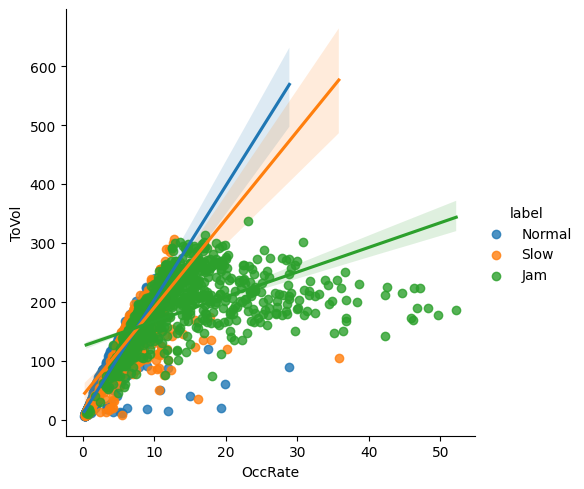

In [ ]:
sns.lmplot(x="OccRate", y="ToVol", hue="label", data=df)

In [ ]:
df[0:288]

,Date,ToVol,SmVol,MeVol,LaVol,Speed,OccRate,new_Date,time,hour,day,day_name,weekday,label
0,2017-04-03 0:00,30,21,9,0,58.6,1.09,2017-04-03 00:00:00,00:00:00,0,3,Monday,0,Normal
1,2017-04-03 0:05,28,17,11,0,57.5,1.29,2017-04-03 00:05:00,00:05:00,0,3,Monday,0,Normal
2,2017-04-03 0:10,42,33,8,1,53.1,1.53,2017-04-03 00:10:00,00:10:00,0,3,Monday,0,Normal
3,2017-04-03 0:15,32,22,9,1,56.2,1.25,2017-04-03 00:15:00,00:15:00,0,3,Monday,0,Normal
4,2017-04-03 0:20,22,15,7,0,52.8,1.02,2017-04-03 00:20:00,00:20:00,0,3,Monday,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2017-04-03 23:35,51,39,12,0,50.4,2.12,2017-04-03 23:35:00,23:35:00,23,3,Monday,0,Normal
284,2017-04-03 23:40,53,38,15,0,54.3,2.05,2017-04-03 23:40:00,23:40:00,23,3,Monday,0,Normal
285,2017-04-03 23:45,19,13,6,0,52.5,0.95,2017-04-03 23:45:00,23:45:00,23,3,Monday,0,Normal
286,2017-04-03 23:50,26,18,8,0,55.4,1.13,2017-04-03 23:50:00,23:50:00,23,3,Monday,0,Normal


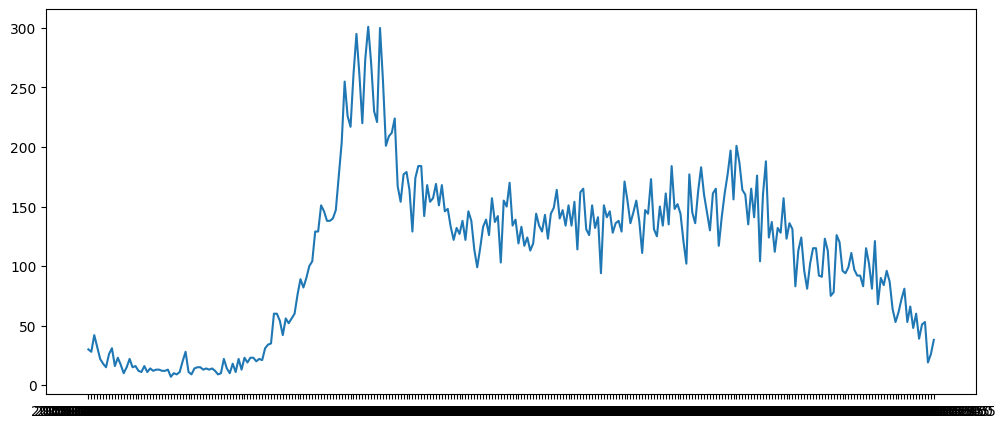

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"][0:288], df["ToVol"][0:288], label="ToVol")

# 실습2

github.com/cokemhlee/FireFighting-BigDataAnalysis

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('/content/Pandas_Excel_Sample.xlsx')
#display(data)
data.head()
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data_proceed = data.sort_values(['평균'], ascending=[False])
display(data_proceed)

,전공,이름,국어,영어,수학,평균
4,국문학과,이효리,95,84,85,88.000000
6,영문학과,이상순,80,85,90,85.000000
2,컴퓨터공학과,홍길동,90,80,80,83.333333
5,영문학과,이상호,74,90,80,81.333333
0,컴퓨터공학과,김철순,70,90,70,76.666667
1,컴퓨터공학과,이순신,80,70,80,76.666667
3,국문학과,박효신,87,64,74,75.000000


In [ ]:
data_proceed = data.sort_values(['평균'], ascending=[False])[0:3]
display(data_proceed)

,전공,이름,국어,영어,수학,평균
4,국문학과,이효리,95,84,85,88.000000
6,영문학과,이상순,80,85,90,85.000000
2,컴퓨터공학과,홍길동,90,80,80,83.333333


In [ ]:
data_proceed = data['이름']
display(data_proceed)

0    김철순
1    이순신
2    홍길동
3    박효신
4    이효리
5    이상호
6    이상순
Name: 이름, dtype: object

In [ ]:
data_proceed = data[data['전공'] == '국문학과']
display(data_proceed)
print('\n')
print(len(data_proceed.index)) # print(len(data_proceed)) 결과 같음
print(data_proceed.index)

,전공,이름,국어,영어,수학,평균
3,국문학과,박효신,87,64,74,75.0
4,국문학과,이효리,95,84,85,88.0




2
Int64Index([3, 4], dtype='int64')


In [ ]:
data_proceed = data.groupby('전공').sum()
display(data_proceed)

<ipython-input-28-4a70eb7c5e4e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_proceed = data.groupby('전공').sum()


,국어,영어,수학,평균
전공,,,,
국문학과,182,148,159,163.000000
영문학과,154,175,170,166.333333
컴퓨터공학과,240,240,230,236.666667


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-30-fe8a2f5a9f29>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)


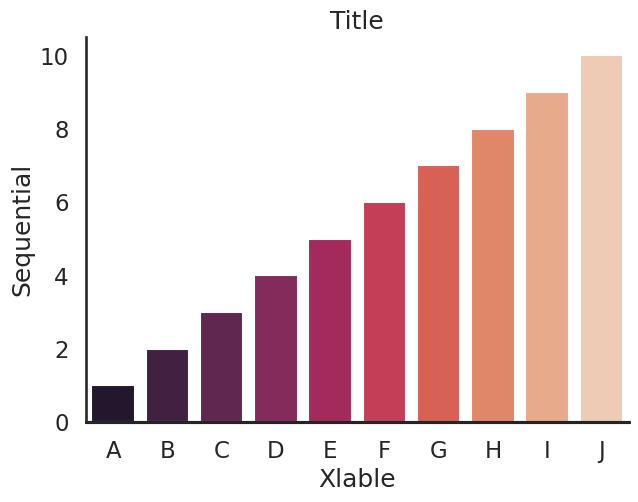

In [ ]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(7, 5))

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

ax1.set_xlabel("Xlable")
ax1.set_title("Title")
sns.despine()

In [ ]:
#!pip install folium
import folium

In [ ]:
map_osm = folium.Map(location=[37.322232, 126.830899])
map_osm

In [ ]:
map_osm = folium.Map(location=[37.322232, 126.830899], zoom_start=16)
map_osm


In [ ]:
map_osm = folium.Map(location=[37.322232, 126.830899], zoom_start=14, tiles='Stamen Toner')
map_osm

In [ ]:
map_osm = folium.Map(location=[37.322232, 126.830899], zoom_start=14)

folium.Marker([37.322232, 126.830899], popup='안산 시청').add_to(map_osm)
folium.Marker([37.325571, 126.816793], popup='화랑저수지',icon=folium.Icon(icon='tint')).add_to(map_osm)

map_osm
#map_osm.save('/content/gdrive/MyDrive/Python/map.html')

# 실습3 - 교통사고 데이터 분석 및 시각화

In [ ]:
import pandas as pd

data = pd.read_csv('/content/도로교통공단_시도 시군구별 교통사고 통계_20211231.csv', encoding='euc-kr')
display(data.tail(10))

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
219,대전,중구,1052,14,242,1222,44
220,대전,서구,2162,13,461,2494,62
221,대전,유성구,1905,16,366,2442,97
222,대전,대덕구,862,6,233,983,33
223,울산,중구,624,8,224,565,60
224,울산,남구,1193,14,342,1143,101
225,울산,동구,467,2,151,456,3
226,울산,북구,786,8,251,789,109
227,울산,울주군,731,18,271,693,80
228,세종,세종시,788,16,278,714,39


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  func(*arg

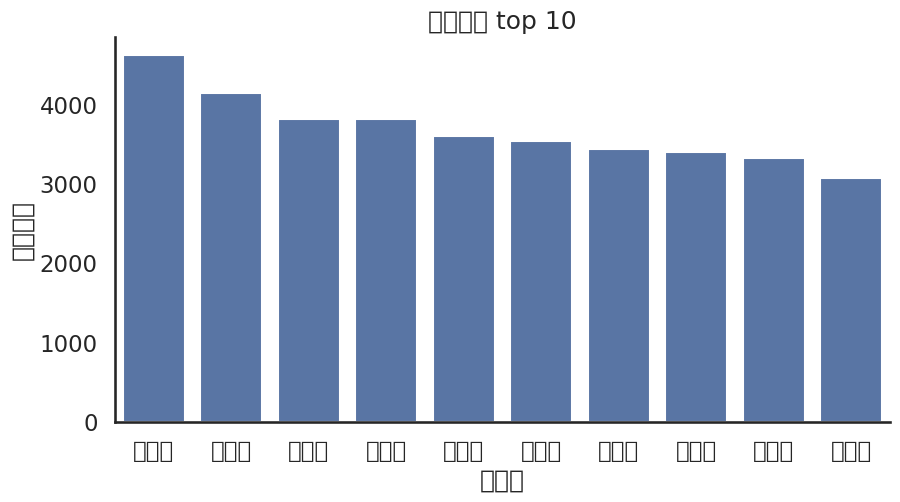

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(10, 5))

data_ac = data.sort_values(['사고건수'],ascending=False)[0:10]

sns.barplot(data=data_ac,x='시군구',y='사고건수')

ax1.set_title('사고건수 top 10')
sns.despine()

한글 글씨체 설치. 설치 후 세션 재시작 필요

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and direc

# 실습4 - 네이버 뉴스 데이터 분석

In [ ]:
!pip install requests Beautifulsoup4

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

In [ ]:
url_front = 'https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%EC%B9%B4%EB%88%88'
visitCount = 0
file = open('/content/naver-crawling.txt', 'w')

for pageIndex in range(1, 22, 10): # 실습 시간을 고려하여 302까지만 실행 (31페이지)
  pageUrl = '{0}{1}'.format(url_front, pageIndex)
  html = urlopen(pageUrl)
  bsObject = BeautifulSoup(html, 'html.parser')
  for link in bsObject.find_all('a', {'class':'news_tit'}):
    data = link.get('title') + '\n'
    file.write(data)

  visitCount += 1
  print('Read {0} page...'.format(visitCount))

  time.sleep(3)
file.close()
print('모든 데이터가 수집되었습니다.')

Read 1 page...
Read 2 page...
Read 3 page...
모든 데이터가 수집되었습니다.


In [ ]:
!pip install konlpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 54.8 MB/s eta 0:00:00


형태소 분석기 konlpy.Twitter

In [ ]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[[('‘', 'Foreign'), ('조선', 'Noun'), ('최고', 'Noun'), ('위직', 'Noun'), ('나무', 'Noun'), ('’', 'Punctuation'), ('정이품송', 'Noun'), ('은', 'Josa'), ('인간', 'Noun'), ('의', 'Josa'), ('흥망', 'Noun'), ('을', 'Josa'), ('알', 'Noun'), ('고', 'Josa'), ('있다', 'Adjective'), ('\n', 'Foreign')], [("'", 'Punctuation'), ('전', 'Modifier'), ('청조', 'Noun'), ('아니었네', 'Adjective'), ("?'", 'Punctuation'), ('2023년', 'Number'), ('뉴스', 'Noun'), ('1', 'Number'), ('위', 'Noun'), ('는', 'Josa'), ('…"', 'Punctuation'), ('558억', 'Number'), ('피해', 'Noun'), ('발생', 'Noun'), ('한', 'Josa'), ('태풍', 'Noun'), ('카눈', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('하종', 'Noun'), ('목', 'Noun'), ('창원시', 'Noun'), ('제', 'Noun'), ('1', 'Number'), ('부시장', 'Noun'), (',', 'Punctuation'), ('태풍', 'Noun'), ("'", 'Punctuation'), ('카눈', 'Noun'), ("'", 'Punctuation'), ('주요', 'Noun'), ('피해', 'Noun'), ('지역', 'Noun'), ('근본', 'Noun'), ('적', 'Suffix'), ('대책', 'Noun'), ('브리핑', 'Noun'), ('\n', 'Foreign')], [("'", 'Punctuation'), ('카눈', 'Noun'), ("'", '

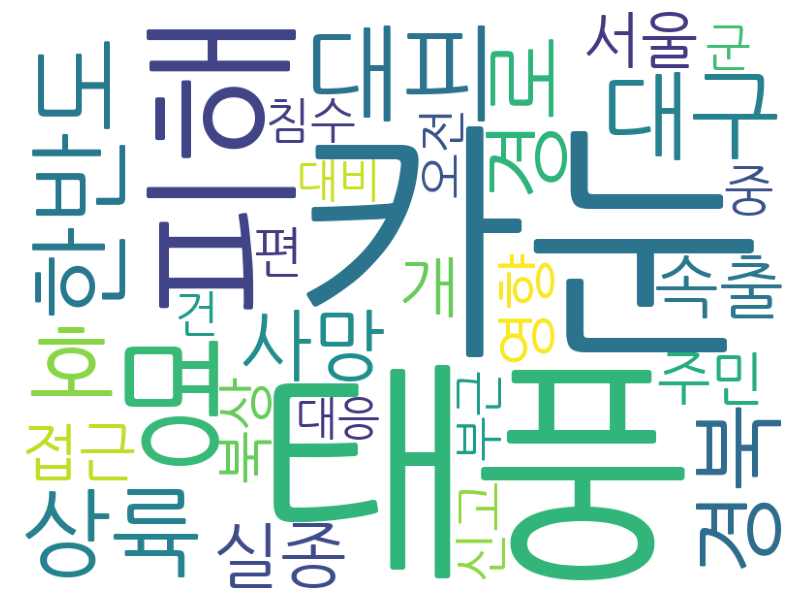

In [ ]:
# 수집한 데이터 title_list 리스트에 넣기
title_list = []

with open("/content/naver-crawling.txt", 'r', encoding='utf-8') as file :
    title_list = file.readlines()

# 형태소 분석하여 sentences_tag 리스트에 넣기
twitter = Twitter()
sentences_tag = []

for sentence in title_list :
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
#    print(morph)
#    print('-'*3)

print(sentences_tag)
#print('\n'*3)

# 명사와 형용사만 구분하여 noun_adj_list 리스트에 넣기
noun_adj_list = []

for sentence1 in sentences_tag :
    for word, tag in sentence1 :
        if tag in ['Noun', 'Adjective'] :
            noun_adj_list.append(word)

# 형태소별 단어 카운트 및 상위 30개 단어 tags 리스트에 넣기
counts = Counter(noun_adj_list)
tags = counts.most_common(30)
#print(tags)

# 한글 깨지는 문제 해결하기 위해 폰트 설정
wc = WordCloud(font_path='/content/NanumGothic.ttf', background_color='white', width=800, height=600)

# 워드 클라우드 생성
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# 실습5 - 이미지 생성 서비스

In [ ]:
!nvidia-smi

Thu Apr  4 05:45:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
!pip install translate

개나리와 벚꽃이 만개한 철교를 지나는 기차
Train through a railway bridge full of ganari and cherry blossoms


  0%|          | 0/50 [00:00<?, ?it/s]

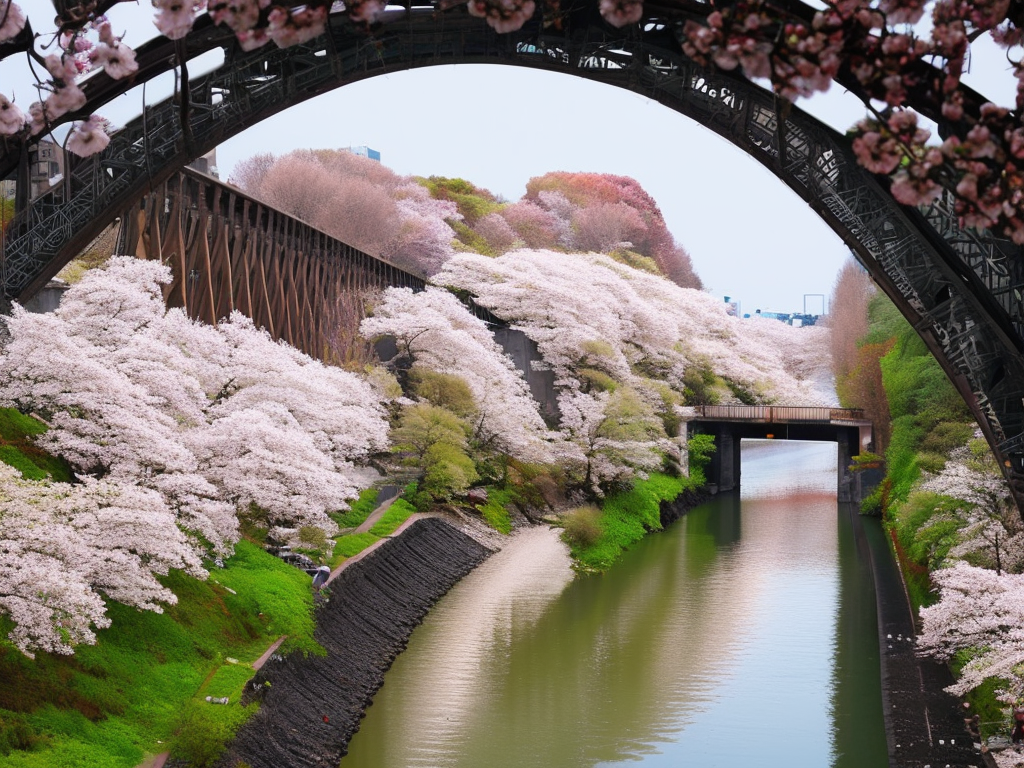

In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

def image_generator(text):
    print(text)
    translation = translator.translate(text)
    print(translation)

    image = pipe(translation, height=768, width=1024).images[0]

    return image

image_generator("소방차")

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 

In [ ]:
import gradio as gr

def inference(text):
    return image_generator(text)

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://bda6e3f2b8b0ad4a23.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


소방차
Fire truck


  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bda6e3f2b8b0ad4a23.gradio.live


# 실습6 - 모델 직접만들기

1/1 [==============================] - 1s 820ms/step
Class: fire
Confidence Score: 1.0


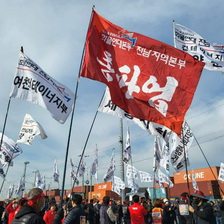

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/202211291717567682_0.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)
image


# 실습7 - 화재피해액 예측

In [ ]:
# 필요한 모듈 임포트
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [ ]:
# 기상관측 자료 로딩
obs_list = pd.read_csv('/content/기상정보_2021.csv', encoding='euc-kr')
obs_list

FileNotFoundError: [Errno 2] No such file or directory: '/content/기상정보_2021.csv'

In [ ]:
# 데이터 컬럼 및 타입 확인
obs_list.info()

NameError: name 'obs_list' is not defined

In [ ]:
# 컬럼명 변경
obs_list.columns = ['지점','지점명','일시','최고기온','최고풍속']

# 데이터 타입 변경
obs_list['지점'] = obs_list['지점'].astype(object)
obs_list['지점명'] = obs_list['지점명'].astype(object)
obs_list['최고기온'] = obs_list['최고기온'].astype(float)
obs_list['최고풍속'] = obs_list['최고풍속'].astype(float)
obs_list['일시'] = pd.to_datetime(obs_list['일시'], format='%Y-%m-%d')
obs_list.info()

NameError: name 'obs_list' is not defined

In [ ]:
# 화재발생 시군구와 매칭하기 위하여 기상관측지점명 전체 집합(Set) 생성
obs_branch_set = set(obs_list['지점명'])
print(len(obs_branch_set))
print(obs_branch_set)

NameError: name 'obs_list' is not defined

In [ ]:
# 소방청 국가화재정보 시도단위 화재발생현황목록 로딩
fire_list = pd.read_csv('/content/화재발생 정보_2021.csv', encoding='euc-kr')
fire_list

FileNotFoundError: [Errno 2] No such file or directory: '/content/화재발생 정보_2021.csv'

In [ ]:
fire_list.info()

NameError: name 'fire_list' is not defined

In [ ]:
# 학습에 필요없는 컬럼 제거
fire_list.drop(['사망', '부상', '인명피해소계', '시도', '장소대분류', '부동산', '동산', '장소대분류', '장소중분류', '장소소분류'],axis=1,inplace=True)
fire_list

NameError: name 'fire_list' is not defined

In [ ]:
# 기상관측자료의 관측일시(연월일만 존재)와 매칭하기 위해서 화재발생년월일 중 시간 정보 삭제
def date_convert(x):
  split_x = x.split()
  return split_x[0]

fire_list['화재발생년월일']=fire_list['화재발생년월일'].apply(date_convert)
fire_list

NameError: name 'fire_list' is not defined

In [ ]:
# 데이터 타입 확인
fire_list.info()

NameError: name 'fire_list' is not defined

In [ ]:
# 데이터 타입 변환
fire_list['화재발생년월일'] = pd.to_datetime(fire_list['화재발생년월일'], format='%Y-%m-%d')
fire_list.info()

NameError: name 'fire_list' is not defined

In [ ]:
# 기상관측자료의 지점명과 매칭시키기 위해 (시군구 등 행정단위가 없음) 화재발생자료의 시군구 컬럼에서 행정단위 제거 및 기상관측지점명과 매칭
def trunk_region(x) :
  for region in obs_branch_set:
    if region in x:
      return region
  return np.NaN

fire_list['시군구'] = fire_list['시군구'].apply(trunk_region)
fire_list

NameError: name 'fire_list' is not defined

In [ ]:
# 매칭 안된 시군구 갯수 확인
fire_list.isna().sum()

NameError: name 'fire_list' is not defined

In [ ]:
# 매칭 안된 화재발생 자료 삭제
fire_list.dropna(axis=0, inplace=True)
fire_list.isna().sum()
fire_list

NameError: name 'fire_list' is not defined

In [ ]:
# 매칭된 시군구 및 갯수 확인
print(fire_list['시군구'].unique())
print(fire_list['시군구'].nunique())

NameError: name 'fire_list' is not defined

In [ ]:
# 기상관측자료와 화재발생자료를 시군구 및 화재발생년월일을 기준으로 조인
fire_obs_list = pd.merge(left = fire_list , right = obs_list, left_on = ['시군구','화재발생년월일'], right_on = ['지점명','일시'], how = "inner")
fire_obs_list


NameError: name 'fire_list' is not defined

In [ ]:
# 결측값 갯수 확인
fire_obs_list.isna().sum()

NameError: name 'fire_obs_list' is not defined

In [ ]:
# 결측데이터 삭제
fire_obs_list.dropna(axis=0,inplace=True)

NameError: name 'fire_obs_list' is not defined

In [ ]:
# 중복 컬럼 삭제
fire_obs_list.drop(['지점','지점명','일시'],axis=1, inplace=True)
fire_obs_list

NameError: name 'fire_obs_list' is not defined

In [ ]:
# 특징과 정답(label) 추출
x_data = fire_obs_list[['최고기온','최고풍속']]
y_data = fire_obs_list['재산피해소계']
x_data
y_data

NameError: name 'fire_obs_list' is not defined

In [ ]:
# 학습집합과 테스트집합 분리 (30%)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

# 분리된 갯수 확인
print(x_train.shape); print(x_test.shape); print(y_train.shape); print(y_test.shape)

NameError: name 'x_data' is not defined

In [ ]:
# 데이터 스케일 조정

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled
x_test_scaled

NameError: name 'x_train' is not defined

In [ ]:
# 모델 정의를 위한 모듈 임포트
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 텐서플로우 학습데이터셋 생성
#train_dataset = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train.values))
#test_dataset = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test.values))
#train_dataset = train_dataset.shuffle(len(train_dataset)).batch(1)

In [ ]:
# 화재 발생 건수 예측 모델 정의 (지역별 최고 기온, 최대 풍속을 입력 특징으로 하고 화재 발생 피해액 예측)

model = Sequential()

model.add(Dense(16,activation='relu',input_dim=2))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습
model.compile(loss='MeanAbsoluteError', optimizer='Adam')
hist = model.fit(x_train_scaled, y_train.values,validation_data=(x_test_scaled, y_test.values),epochs=10)

NameError: name 'x_train_scaled' is not defined

In [ ]:
# 학습과정 가시화
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

NameError: name 'hist' is not defined

In [ ]:
# 모델 평가
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test.values))
test_dataset = test_dataset.shuffle(len(test_dataset)).batch(1)
results = model.evaluate(test_dataset)
print(f"test loss: {results}")

NameError: name 'x_test_scaled' is not defined

In [ ]:
# 추론
real_data = scaler.transform([[30.4,25.0]])
y_pred = model.predict(real_data)
print(y_pred)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 실습8 - 민원게시판 크롤링

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="matthewburke/korean_sentiment")
custom_tweet = "영화 재밌다."
preds = classifier(custom_tweet, return_all_scores=True)
is_positive = preds[0][1]['score'] > 0.5


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/788k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
print(is_positive)

True


In [ ]:
import pandas as pd

df = pd.read_excel('/content/경찰청 민원게시판.xlsx')
df

,순번,제목_URL,제목,등록일,Text
0,16395,https://www.police.go.kr/user/bbs/BD_selectBbs...,"인터넷 쇼핑몰 ""쿠팡""을 고발합니다!",2024-01-24,지난 1월 3일 쿠팡에서 호신용 보안용품인 삼단봉을 구매하였습니다. 구매당시부터 판...
1,16394,https://www.police.go.kr/user/bbs/BD_selectBbs...,인터넷 쇼핑몰 Aliexpress를 고발합니다.,2024-01-24,본인은 지난 10월에 인터넷 쇼핑몰 aliexpress를 통해서 4가지의 피규어 제...
2,16393,https://www.police.go.kr/user/bbs/BD_selectBbs...,경찰청장 님께 드리는 다소 사적인 질문.,2024-01-24,어느 촌장의 고민?(목자의 고민)\n어느 마을 어귀에 매우 크고 아름다운 한 그루의...
3,16392,https://www.police.go.kr/user/bbs/BD_selectBbs...,衛氏朝鮮 V2kの?要と中間報告。,2024-01-24,衛氏朝鮮 V2kの?要と中間報告。\nV2kの?要と中間報告。\nV2kの?要。? V2kは...
4,16391,https://www.police.go.kr/user/bbs/BD_selectBbs...,위만조선 V2k의 개요 및 중간보고.,2024-01-24,V2k의 개요. V2k는 개인사찰 공작중에 하나로 전파공작을 말합니다. 정보기관의 ...
...,...,...,...,...,...
95,16300,https://www.police.go.kr/user/bbs/BD_selectBbs...,인터넷 쇼핑몰 Aliexpress를 고발합니다.,2024-01-22,본인은 지난 10월에 인터넷 쇼핑몰 aliexpress를 통해서 4가지의 피규어 제...
96,16299,https://www.police.go.kr/user/bbs/BD_selectBbs...,경찰청장 님께 드리는 다소 사적인 질문.,2024-01-22,어느 촌장의 고민?(목자의 고민)\n어느 마을 어귀에 매우 크고 아름다운 한 그루의...
97,16298,https://www.police.go.kr/user/bbs/BD_selectBbs...,衛氏朝鮮 V2kの?要と中間報告。,2024-01-22,衛氏朝鮮 V2kの?要と中間報告。\nV2kの?要と中間報告。\nV2kの?要。? V2kは...
98,16297,https://www.police.go.kr/user/bbs/BD_selectBbs...,위만조선 V2k의 개요 및 중간보고.,2024-01-22,V2k의 개요. V2k는 개인사찰 공작중에 하나로 전파공작을 말합니다. 정보기관의 ...


In [ ]:
def sentiment(text):
    preds = classifier(text[:512],return_all_scores=True)
    print(preds)
    if (preds[0][1]['score'] > 0.5):
        return '긍정'
    else:
        return '부정'

In [ ]:
sentiment(df.loc[0,'Text'])

[[{'label': 'LABEL_0', 'score': 0.9028083682060242}, {'label': 'LABEL_1', 'score': 0.09719166159629822}]]


'부정'

In [ ]:
df['Sentiment'] = df['Text'].apply(sentiment)
df

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 0.9028083682060242}, {'label': 'LABEL_1', 'score': 0.09719166159629822}]]
[[{'label': 'LABEL_0', 'score': 0.8867743015289307}, {'label': 'LABEL_1', 'score': 0.11322570592164993}]]
[[{'label': 'LABEL_0', 'score': 0.6162126660346985}, {'label': 'LABEL_1', 'score': 0.38378727436065674}]]
[[{'label': 'LABEL_0', 'score': 0.30722174048423767}, {'label': 'LABEL_1', 'score': 0.6927782297134399}]]
[[{'label': 'LABEL_0', 'score': 0.7950368523597717}, {'label': 'LABEL_1', 'score': 0.20496311783790588}]]
[[{'label': 'LABEL_0', 'score': 0.8745097517967224}, {'label': 'LABEL_1', 'score': 0.1254902184009552}]]
[[{'label': 'LABEL_0', 'score': 0.7599110007286072}, {'label': 'LABEL_1', 'score': 0.24008898437023163}]]
[[{'label': 'LABEL_0', 'score': 0.726939857006073}, {'label': 'LABEL_1', 'score': 0.2730601727962494}]]
[[{'label': 'LABEL_0', 'score': 0.8534290194511414}, {'label': 'LABEL_1', 'score': 0.14657096564769745}]]
[[{'label': 'LABEL_0', 'score': 0.853429019451141

,순번,제목_URL,제목,등록일,Text,Sentiment
0,16395,https://www.police.go.kr/user/bbs/BD_selectBbs...,"인터넷 쇼핑몰 ""쿠팡""을 고발합니다!",2024-01-24,지난 1월 3일 쿠팡에서 호신용 보안용품인 삼단봉을 구매하였습니다. 구매당시부터 판...,부정
1,16394,https://www.police.go.kr/user/bbs/BD_selectBbs...,인터넷 쇼핑몰 Aliexpress를 고발합니다.,2024-01-24,본인은 지난 10월에 인터넷 쇼핑몰 aliexpress를 통해서 4가지의 피규어 제...,부정
2,16393,https://www.police.go.kr/user/bbs/BD_selectBbs...,경찰청장 님께 드리는 다소 사적인 질문.,2024-01-24,어느 촌장의 고민?(목자의 고민)\n어느 마을 어귀에 매우 크고 아름다운 한 그루의...,부정
3,16392,https://www.police.go.kr/user/bbs/BD_selectBbs...,衛氏朝鮮 V2kの?要と中間報告。,2024-01-24,衛氏朝鮮 V2kの?要と中間報告。\nV2kの?要と中間報告。\nV2kの?要。? V2kは...,긍정
4,16391,https://www.police.go.kr/user/bbs/BD_selectBbs...,위만조선 V2k의 개요 및 중간보고.,2024-01-24,V2k의 개요. V2k는 개인사찰 공작중에 하나로 전파공작을 말합니다. 정보기관의 ...,부정
...,...,...,...,...,...,...
95,16300,https://www.police.go.kr/user/bbs/BD_selectBbs...,인터넷 쇼핑몰 Aliexpress를 고발합니다.,2024-01-22,본인은 지난 10월에 인터넷 쇼핑몰 aliexpress를 통해서 4가지의 피규어 제...,부정
96,16299,https://www.police.go.kr/user/bbs/BD_selectBbs...,경찰청장 님께 드리는 다소 사적인 질문.,2024-01-22,어느 촌장의 고민?(목자의 고민)\n어느 마을 어귀에 매우 크고 아름다운 한 그루의...,부정
97,16298,https://www.police.go.kr/user/bbs/BD_selectBbs...,衛氏朝鮮 V2kの?要と中間報告。,2024-01-22,衛氏朝鮮 V2kの?要と中間報告。\nV2kの?要と中間報告。\nV2kの?要。? V2kは...,긍정
98,16297,https://www.police.go.kr/user/bbs/BD_selectBbs...,위만조선 V2k의 개요 및 중간보고.,2024-01-22,V2k의 개요. V2k는 개인사찰 공작중에 하나로 전파공작을 말합니다. 정보기관의 ...,부정


In [ ]:
df['Sentiment'].value_counts()

Sentiment
부정    89
긍정    11
Name: count, dtype: int64

In [ ]:
df[df['Sentiment']=='긍정']

,순번,제목_URL,제목,등록일,Text,Sentiment
3,16392,https://www.police.go.kr/user/bbs/BD_selectBbs...,衛氏朝鮮 V2kの?要と中間報告。,2024-01-24,衛氏朝鮮 V2kの?要と中間報告。\nV2kの?要と中間報告。\nV2kの?要。? V2kは...,긍정
13,16382,https://www.police.go.kr/user/bbs/BD_selectBbs...,부산 워케이션 신청방법 안내 (1박당 숙박비 5만원 지원),2024-01-24,"바다로 출근합니다. 일, 휴가를 동시에 즐기는 ""부산형 워케이션"" 지금 무료 신청해...",긍정
19,16376,https://www.police.go.kr/user/bbs/BD_selectBbs...,개인사를 조롱거리로 만들었어오,2024-01-23,온라인겜임을 접었다가 오즘다시 시작했는데요 제가 우울증이랑불안장애 공항장애로 약을...,긍정
23,16372,https://www.police.go.kr/user/bbs/BD_selectBbs...,衛氏朝鮮 V2kの?要と中間報告。,2024-01-23,衛氏朝鮮 V2kの?要と中間報告。\nV2kの?要と中間報告。\nV2kの?要。? V2kは...,긍정
33,16362,https://www.police.go.kr/user/bbs/BD_selectBbs...,스마트 국민제보 앱 개선,2024-01-23,"안녕하세요. 해외살고있지만 대한민국 국적의 국민이며 한국도 종종 방문하는데요,\n한...",긍정
39,16356,https://www.police.go.kr/user/bbs/BD_selectBbs...,"도봉,노원 경찰노고에 초안산 정상 갱년기극복 산행이 안심 감사!!!!",2024-01-23,눈이 많이내려 산행조차 어려운 날 경찰 제복은 초안산 정상에서 만난 우리들의 안도 였다,긍정
41,16354,https://www.police.go.kr/user/bbs/BD_selectBbs...,시티즌 코난,2024-01-23,보이스 피싱 당해서 시티즌 코난 앱 매일 사용하는 사람입니다. 경찰청 협업이...,긍정
42,16353,https://www.police.go.kr/user/bbs/BD_selectBbs...,김포경찰서의 관할조정,2024-01-23,청장님 안녕하세요 전 경찰청장님도 그러셨고 지금 김포경찰서의 경기북부경찰청으로 관할...,긍정
46,16349,https://www.police.go.kr/user/bbs/BD_selectBbs...,衛氏朝鮮 V2kの?要と中間報告。,2024-01-23,衛氏朝鮮 V2kの?要と中間報告。\nV2kの?要と中間報告。\nV2kの?要。? V2kは...,긍정
79,16316,https://www.police.go.kr/user/bbs/BD_selectBbs...,衛氏朝鮮 V2kの?要と中間報告。,2024-01-22,衛氏朝鮮 V2kの?要と中間報告。\nV2kの?要と中間報告。\nV2kの?要。? V2kは...,긍정


# 실습9 - 산불탐지

In [1]:
! pip install -q kaggle


# Kaggle API 호출을 위한 API Key 업로드
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


# 학습 데이터 다운로드 및 압축풀기

! kaggle datasets download -d phylake1337/fire-dataset
! unzip fire-dataset.zip




Saving kaggle.json to kaggle.json
ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          18903        376  0.9411765        
sahirmaharajj/electric-vehicle-population-size-2024         Electric Vehicle Population by Country (2024)  275KB  2024-03-30 19:16:06            987         29  1.0              
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification               56KB  2024-03-28 15:02:22           1518         33  1.0              
bhavikjikadara/student-study-performance                    Student Stu

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

In [10]:
# 데이터 프레임 만들기 (파일 위치, 레이블)

import pandas as pd
import os

# 빈 데이터프레임 생성
df = pd.DataFrame(columns=['path','label'])
type(df)

pandas.core.frame.DataFrame

In [15]:
# fire 이미지와 레이블 'fire'
for dirname, _, filenames in os.walk('/content/fire_dataset/fire_images'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        tmp = pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label'])
        print(tmp)
        df = df.append(tmp)
        #df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))

# non-fire 이미지와 레이블 'non_file'
for dirname, _, filenames in os.walk('/content/fire_dataset/non_fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

# 학습을 위한 데이터 섞기
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

                                            path label
0  /content/fire_dataset/fire_images/fire.17.png  fire


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='label', order=['fire','non_fire'])


# fire 이미지 샘플 확인
import matplotlib.pyplot as plt

label = 'fire'
data = df[df['label'] == label]
#sns.set_style('dark')

pics = 6 # 샘플 갯수
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
# non-fire 이미지 샘플 확인

label = 'non_fire'
data = df[df['label'] == label]
#sns.set_style('dark')

pics = 6 # 샘플 갯수
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
# 데이터 증강 (Augmentation)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

In [ ]:
# 학습 집합과 검증 집합 생성
# ImageDataGenerator가 자동으로 레이블을 인코딩
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')


In [ ]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key

print(class_indices)

In [ ]:
# ImageDataGenerator가 생성한 이미지 확인

pics = 6 # 샘플 갯수
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
# 모델 정의

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))  #왜 3일까요?
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid')) #왜 sigmoid일까요?

# 앞 부분에는 노이즈가 많으므로 적은 필터를 사용하고 깊은 층으로 갈수록 더 많은 특징을 추출하기 위해 필터 수를 늘입니다.


In [ ]:
# 모델 구조 요약

model.summary()


# 모델 컴파일

from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()]) # 왜 binary_crossentrophy 일까요?  # 왜 Recall이 중요할까요?


In [ ]:
# 조기종료 적용

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


In [ ]:
class_weight={0:0.3, 1:1.}

In [ ]:
# 학습
model.fit(x=train_gen,batch_size=32,epochs=5,validation_data=val_gen,callbacks=[early_stoppping], class_weight=class_weight)


In [ ]:
# 학습 그래프 보기

history= model.history.history
px.line(history,title = "Metrics Plot")


# 모델 평가
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

# 잘한 것일까요?

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout


# 사전학습 모델 다운로드 및 산불화재탐지 모델 정의
xception = Xception(include_top = False,input_shape = (256,256,3))
input_to_model = xception.input
#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs = input_to_model,outputs = output_to_model)

In [ ]:
model2.summary()


# 모델 컴파일

model2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])


# 학습
history2 = model2.fit(x = train_gen,batch_size=32,epochs=5,callbacks = [early_stoppping],validation_data = val_gen, class_weight=class_weight)


In [ ]:
# 학습 그래프 보기

history= model2.history.history
px.line(history,title='Metrics Plot')

In [ ]:
# 모델 평가

eval_list = model2.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")


In [ ]:
# 이미지 다운로드
#!curl https://static01.nyt.com/images/2021/02/19/world/19storm-briefing-texas-fire/19storm-briefing-texas-fire-articleLarge.jpg --output predict.jpg
#!curl https://transcode-v2.app.engoo.com/image/fetch/f_auto,c_limit,w_1280,h_800,dpr_2/https://assets.app.engoo.com/images/6b7V4hOYczy7ODsXQtkVAg.jpeg --output predict.jpg
!curl https://img.seoul.co.kr/img/upload/2020/07/01/SSI_20200701210037.jpg --output predict.jpg


# 다운로드 이미지 확인
img = image.load_img('predict.jpg')
img


# 이미지를 모델에 입력형태로 변환

img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)


# 예측 및 결과 확인
prediction = int(tf.round(model.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])